template


In [1]:
## Instalação r2u

shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

## Preparando acesso ao Google Drive
loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
    install.packages(pkgs[!ok])
    loadPackages(pkgs[!ok])
  }
}

loadPackages(c("googledrive", "httpuv", "R.utils", "httr"))

my_check = function() TRUE
reassignInPackage("is_interactive", pkgName="httr", my_check)
options(rlang_interactive=TRUE)




19 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
wget is already the newest version (1.21.2-2ubuntu1).
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6p

Tracing function "install.packages" in package "utils"

There are missing packages: httpuv, R.utils


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save



Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [2]:
## O comando abaixo permite acesso ao Google Drive
drive_auth(use_oob=TRUE, cache=FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=8890fc2cbad2c19c0a8ca5613621ddc2&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbmV6YTVDQUxjRTViLTRjU3NRQkpLSnB6cFNNeDJnZk5VdUJ6WklkVFpibnkyV3dJRVJDZUZETDVLZzZHOUhJUSIsInN0YXRlIjoiODg5MGZjMmNiYWQyYzE5YzBhOGNhNTYxMzYyMWRkYzIifQ==


Instruções


In [3]:
library(tidyverse)
library(readxl)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks R.utils::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
covid19SP <- read_tsv("covid19SP.tsv")
eleicoes_turno2 <- read_csv("eleicoes_turno2_SP.csv")
estimativa <- read_xls("estimativa_dou_2021.xls")




Rows: 646 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): nome_munic
dbl (2): CASOS, OBITOS

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1560 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): NM_MUNICIPIO, NM_CANDIDATO
dbl (3): CD_MUNICIPIO, NR_ZONA, QT_VOTOS_NOMINAIS

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...2`
• `` -> `...3`


1. Leia a planilha que possui informações do tamanho populacional (estimado para 2021) de cada um dos municípios
brasileiros, presente no arquivo estimativa_dou_2021.xls e a armazene no objeto chamado populacao. A
leitura deve compreender apenas os dados de interesse

In [5]:
populacao <- read_xls("estimativa_dou_2021.xls", range = "A2:E5572", sheet = 2)
head(populacao)

UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
<chr>,<dbl>,<chr>,<chr>,<chr>
RO,11,00015,Alta Floresta D'Oeste,22516
RO,11,00023,Ariquemes,111148
RO,11,00031,Cabixi,5067
RO,11,00049,Cacoal,86416
RO,11,00056,Cerejeiras,16088
RO,11,00064,Colorado do Oeste,15213


2. Usando verbos do tidyverse: a) mantenha apenas os registros de municípios do estado de São Paulo,
b) renomeie as colunas NOME DO MUNICÍPIO e POPULAÇÃO ESTIMADA, respectivamente, para MUNICIPIO e
POPULACAO; e c) armazene esta tabela no objeto populacao, mantendo apenas estas duas colunas com seus
devidos tipos de variáveis.


In [6]:
populacao <- populacao %>% filter(UF == "SP") %>%
            rename(MUNICIPIO ='NOME DO MUNICÍPIO' , POPULACAO = 'POPULAÇÃO ESTIMADA') %>%
            select(MUNICIPIO, POPULACAO) %>%
            mutate("MUNICIPIO" = as.character(MUNICIPIO), "POPULACAO" = as.integer(POPULACAO))
head(populacao)



MUNICIPIO,POPULACAO
<chr>,<int>
Adamantina,35153
Adolfo,3545
Aguaí,36981
Águas da Prata,8262
Águas de Lindóia,18908
Águas de Santa Bárbara,6142


3. Utilize a função dada abaixo:
maiusc_sem_acento = function(v){
stringi::stri_trans_general(str_to_upper(v), id = "Latin-ASCII")
}
para converter os nomes dos municípios para letras maiúsculas e remover os acentos da coluna MUNICIPIO do objeto
populacao (utilize verbos do pacote tidyverse).

In [7]:
maiusc_sem_acento = function(v){
stringi::stri_trans_general(str_to_upper(v), id = "Latin-ASCII")
}





In [8]:
CONVERTIDO  <- populacao %>% mutate("MUNICIPIO" = maiusc_sem_acento(MUNICIPIO))

head(CONVERTIDO)

MUNICIPIO,POPULACAO
<chr>,<int>
ADAMANTINA,35153
ADOLFO,3545
AGUAI,36981
AGUAS DA PRATA,8262
AGUAS DE LINDOIA,18908
AGUAS DE SANTA BARBARA,6142


4. Importe o arquivo eleicoes_turno2_SP.csv por partes. Cada parte deve ser lida com, no máximo, 100
registros. A função de callback deve ser chamada getStats e função que combinará os resultados parciais
deve ser chamada computeStats. O objetivo final deste item é ter uma tabela (chamada votos), em
formato tidy, indicando o número de votos recebido por cada um dos candidatos em cada um dos
municípios. Utilize, também, as informações abaixo:


In [9]:
getStats = function(input, pos){
        input %>%
          drop_na()
}




votos =read_csv_chunked("eleicoes_turno2_SP.csv",chunk_size = 100,
             callback= DataFrameCallback$new(getStats),
             col_types = cols_only(NM_MUNICIPIO ='c',
                                   NM_CANDIDATO = 'c',
                                   QT_VOTOS_NOMINAIS = 'i'))
votos <- votos %>%
   mutate( "NM_CANDIDATO" = ifelse(NM_CANDIDATO == "JAIR MESSIAS BOLSONARO", "BOLSONARO", "HADDAD"))

computeStats = function(input){
       input %>%
         group_by(NM_CANDIDATO,NM_MUNICIPIO) %>%
         summarise(votos_t = sum(QT_VOTOS_NOMINAIS))
}
votos <- computeStats(votos)
 head(votos)

`summarise()` has grouped output by 'NM_CANDIDATO'. You can override using the
`.groups` argument.


NM_CANDIDATO,NM_MUNICIPIO,votos_t
<chr>,<chr>,<int>
BOLSONARO,ADAMANTINA,15088
BOLSONARO,ADOLFO,2041
BOLSONARO,AGUAI,10765
BOLSONARO,AGUAS DA PRATA,3172
BOLSONARO,AGUAS DE LINDOIA,8221
BOLSONARO,AGUAS DE SANTA BARBARA,2448


5. Leia o arquivo covid19SP.tsv usando o pacote readr e armazene o resultado no objeto covid19sp

In [10]:
covid19SP <- read_tsv("covid19SP.tsv")
head(covid19SP)

Rows: 646 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): nome_munic
dbl (2): CASOS, OBITOS

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


nome_munic,CASOS,OBITOS
<chr>,<dbl>,<dbl>
ADAMANTINA,3757,132
ADOLFO,624,19
AGUAI,3574,109
AGUAS DA PRATA,639,26
AGUAS DE LINDOIA,2023,50
AGUAS DE SANTA BARBARA,590,18


6. Que municípios (juntamente com número de casos e óbitos) estão listados no objeto covid19sp que não possuem
estimativa de tamanho de população?

In [11]:

municipios <- covid19SP %>%
            anti_join(CONVERTIDO, by = c("nome_munic" = "MUNICIPIO" ))

head(municipios)


nome_munic,CASOS,OBITOS
<chr>,<dbl>,<dbl>
IGNORADO,989,0


 Tem 989 municipios que não possuem estimativa de população

7. Crie uma tabela que unifique os objetos populacao, votos e covid19sp. Armazene esta tabela no objeto
dados_covid_sp

In [31]:


primeiro_join <- CONVERTIDO %>%
                   left_join(covid19SP, by=c("MUNICIPIO" = "nome_munic"))





 dados_covid_sp <- primeiro_join %>%
   inner_join(votos, by = c("MUNICIPIO" = "NM_MUNICIPIO" ))








 #full <- primeiro_join %>%
  #full_join(votos, by = c("MUNICIPIO" = "NM_MUNICIPIO" ))

#full$MUNICIPIO <- str_replace(full$MUNICIPIO, pattern = "'", replacement = " ")

#full
 # comparar <- full %>% anti_join(dados_covid_sp, by = "MUNICIPIO" )






MUNICIPIO,POPULACAO,CASOS,OBITOS,NM_CANDIDATO,votos_t
<chr>,<int>,<dbl>,<dbl>,<chr>,<int>
ADAMANTINA,35153,3757,132,BOLSONARO,15088
ADAMANTINA,35153,3757,132,HADDAD,3156
ADOLFO,3545,624,19,BOLSONARO,2041
ADOLFO,3545,624,19,HADDAD,661
AGUAI,36981,3574,109,BOLSONARO,10765
AGUAI,36981,3574,109,HADDAD,4335
AGUAS DA PRATA,8262,639,26,BOLSONARO,3172
AGUAS DA PRATA,8262,639,26,HADDAD,997
AGUAS DE LINDOIA,18908,2023,50,BOLSONARO,8221


8. Apresente um gráfico de pontos, usando ggplot2, que tenha em seu eixo X a proporção de votos em favor
Bolsonaro dentro da população e, no eixo Y, a proporção de casos de COVID-19 observada entre os habitantes
daquele município.

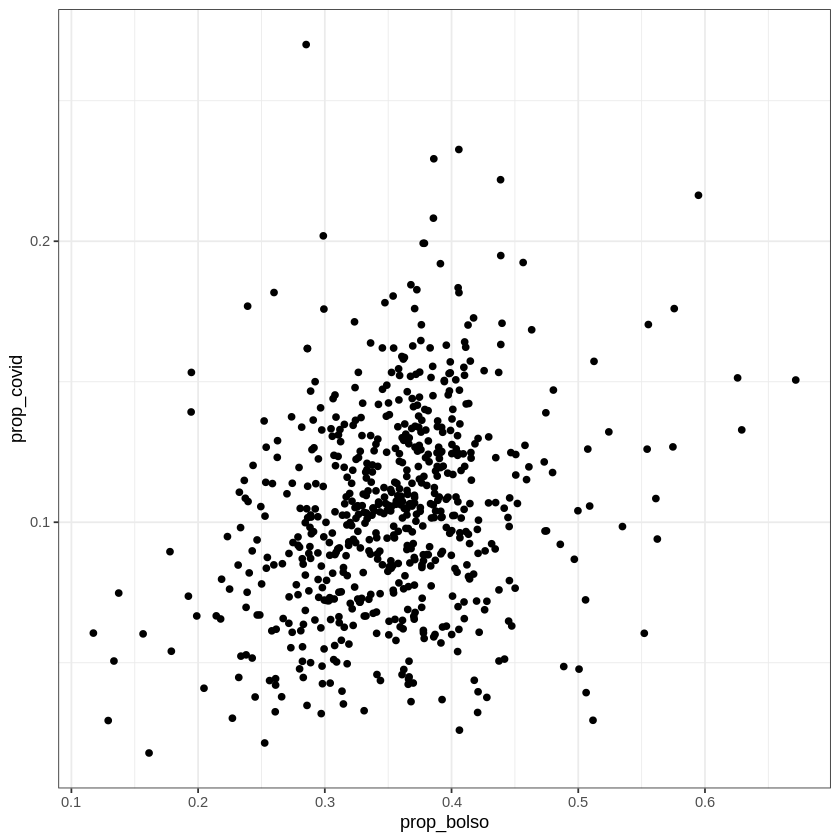

In [13]:
novo <- dados_covid_sp %>% group_by(NM_CANDIDATO) %>%
            filter(NM_CANDIDATO == "BOLSONARO") %>%
            mutate(prop_bolso = votos_t/POPULACAO, prop_covid = CASOS/POPULACAO)




ggplot(novo, aes(x = prop_bolso, y = prop_covid)) + geom_point() + theme_bw()